# Visualisation notebook

In [2]:
import os
import sys 
import time 
import torch  
import networkx as nx
import matplotlib.pyplot as plt

from utils import chebyshev
from laplacian import normalized_laplacian



In [3]:
# Import the dataset from file
from Dataset import MNISTDataset
nb_test = 20
test_labels = torch.load('mnist/test_label.pt')
test_data = torch.load('mnist/test_data.pt').reshape(10000, 784)
test_data = test_data[:nb_test, :]
testset = MNISTDataset(test_data,test_labels[:nb_test])

In [4]:
testset[0]

(DGLGraph(num_nodes=784, num_edges=3024,
          ndata_schemes={'h': Scheme(shape=(), dtype=torch.float32)}
          edata_schemes={}), tensor(7))

In [5]:
def showGraph(graph, label, signal = False):
    '''
    Function to visualise the signal of the handwritten digits over a lattice graph
    '''
    
    if signal is False: signal = graph.ndata['h'] 
    nx_G = graph.to_networkx().to_undirected()

    # Kamada-Kawaii layout
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=signal)
    plt.title('Class: {:d}'.format(label))
    plt.figure(figsize=(10,3))
    plt.show()

/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


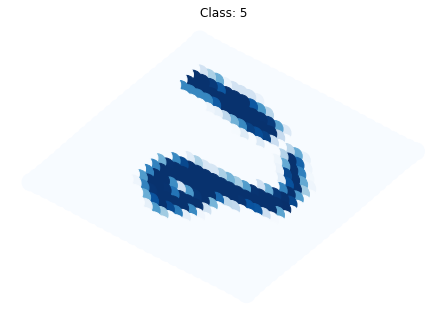

<Figure size 720x216 with 0 Axes>

In [6]:
import random
showGraph(*testset[random.randrange(10)])

In [7]:
def showChebFilters(graph, label, K):
    '''
    Function to visualise the signal of the handwritten digits over a lattice graph
    '''
    t = time.time()
    nx_G = graph.to_networkx().to_undirected()
    elapsed = time.time() - t
    print('it takes', elapsed, ' to transfer the graph to nX')
    t = time.time()
    # Xt = chebyshev(rescale_L(torch.from_numpy(nx.normalized_laplacian_matrix(
    #    graph.to_networkx().to_undirected()).todense()).float()), graph.ndata['h'].view(-1, 1), K)
    Xt = chebyshev(normalized_laplacian(graph),
                   graph.ndata['h'].view(-1, 1), K)
    elapsed = time.time() - t
    print('it takes', elapsed, ' to transfer the graph to calculate all Xts')
    t = time.time()
    # Kamada-Kawaii layout
    pos = nx.kamada_kawai_layout(nx_G)
    elapsed = time.time() - t
    print('it takes', elapsed, ' to calculate the position of the nodes')

    plt.suptitle('Class: {:d}'.format(label), fontsize=12)
    plt.subplot(231)
    plt.title('Chebynome order 0')
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=Xt[0].view(-1))

    plt.subplot(232)
    plt.title('Chebynome order 1')
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=Xt[1].view(-1))

    plt.subplot(233)
    plt.title('Chebynome order 2')
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=Xt[2].view(-1))

    plt.subplot(234)
    plt.title('Chebynome order 3')
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=Xt[3].view(-1))
    plt.subplot(235)
    plt.title('Chebynome order 4')
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=Xt[4].view(-1))
    plt.subplot(236)
    plt.title('Chebynome order 5')
    nx.draw(nx_G, pos, with_labels=False,
            cmap=plt.cm.Blues, node_color=Xt[5].view(-1))
    plt.show()

it takes 0.035128116607666016  to transfer the graph to nX
it takes 0.024584293365478516  to transfer the graph to calculate all Xts
it takes 9.160045623779297  to calculate the position of the nodes


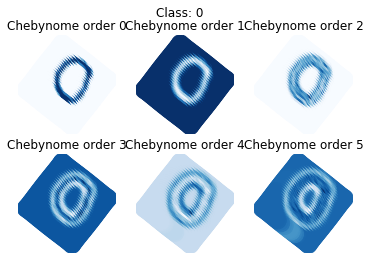

In [8]:
gtest, ltest = testset[random.randrange(20)]

showChebFilters(gtest, ltest, K=6)

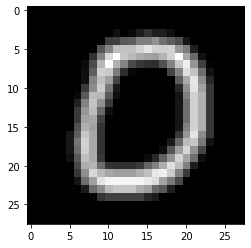

In [12]:
%matplotlib inline
L = normalized_laplacian(gtest)
Xt = chebyshev(L, gtest.ndata['h'].view(-1, 1), K=25)
plt.imshow(Xt[1].view(28, 28),cmap='gray_r')
pass

/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 432x288 with 0 Axes>

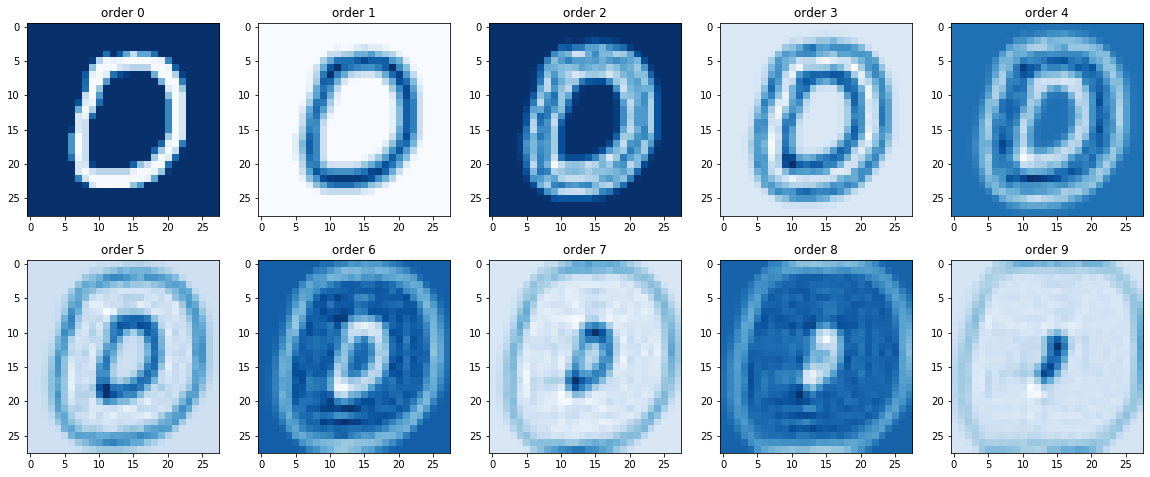

In [46]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,5,figsize=(20, 8)) 

color='Blues_r'
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0,0].imshow(Xt[0].view(28, 28),cmap=color)
axarr[0,0].set_title('order 0')
axarr[0,1].imshow(Xt[1].view(28, 28),cmap=color)
axarr[0,1].set_title('order 1')
axarr[0,2].imshow(Xt[2].view(28, 28),cmap=color)
axarr[0,2].set_title('order 2')
axarr[0,3].imshow(Xt[3].view(28, 28),cmap=color)
axarr[0,3].set_title('order 3')
axarr[0,4].imshow(Xt[4].view(28, 28),cmap=color)
axarr[0,4].set_title('order 4')
axarr[1,0].imshow(Xt[5].view(28, 28),cmap=color)
axarr[1,0].set_title('order 5')
axarr[1,1].imshow(Xt[6].view(28, 28),cmap=color)
axarr[1,1].set_title('order 6')
axarr[1,2].imshow(Xt[7].view(28, 28),cmap=color)
axarr[1,2].set_title('order 7')
axarr[1,3].imshow(Xt[8].view(28, 28),cmap=color)
axarr[1,3].set_title('order 8')
axarr[1,4].imshow(Xt[9].view(28, 28),cmap=color)
axarr[1,4].set_title('order 9')
f.show()
f.savefig('./Chebynome.png')

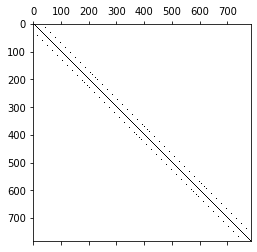

In [77]:
plt.spy(L.to_dense())